In [1]:
import actionet
import actionet.preprocessing
import actionet.tools
import scipy
import numpy as np
import scanpy as sc
import anndata
import pandas as pd
from anndata import AnnData

import matplotlib.pyplot as plt

In [2]:
adata = anndata.read_h5ad("../data/test_adata.h5ad")

In [3]:
adata = actionet.preprocessing.filter_anndata(adata, min_cells_per_feat=0.01, inplace=False)

adata.layers['logcounts'] = sc.pp.normalize_total(adata, target_sum=1e4, inplace=False)['X']
sc.pp.log1p(adata, layer='logcounts', base=2, copy=False)

In [4]:
actionet.reduce_kernel(adata, n_components=30, layer='logcounts', key_added='action', inplace=True)

Computing reduced ACTION kernel:
Performing SVD using IRLB (sparse) -- A: 14409 x 6790


In [5]:
adata2 = actionet.run_actionet(adata, k_max=30, layer='logcounts', inplace=False)

Running ACTION decomposition...
Running ACTION (14 threads):
	Iterating from k = 2 ... 30: 29/29 finished
Joining trace of C & H matrices (depth = 30) ... done (464 archetypes)
Pruning archetypes:
	Non-specific archetypes: 4
	Unreproducible archetypes: 64
	Trivial archetypes: 1
Merging 395 archetypes:
Archetypes in merged set: 24
Building network...
Building adaptive network (density = 1.00)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... done
Computing archetype footprints via diffusion...
Computing 2D UMAP layout...
Optimizing layout using method 'umap': 2 components 
UMAP embedding parameters a = 0.115, b = 1.929, gamma = 1.000
Optimizing for 100 epochs with 14 threads 
Optimizing with Adam:
	 alpha = 1.000,  beta1 = 0.500, beta2 = 0.900, eps = 1.000e-07
Optimization finished
Computing 3D UMAP layout...
Optimizing layout using method 'umap': 3 components 
UMAP embedding parameters a = 0.1

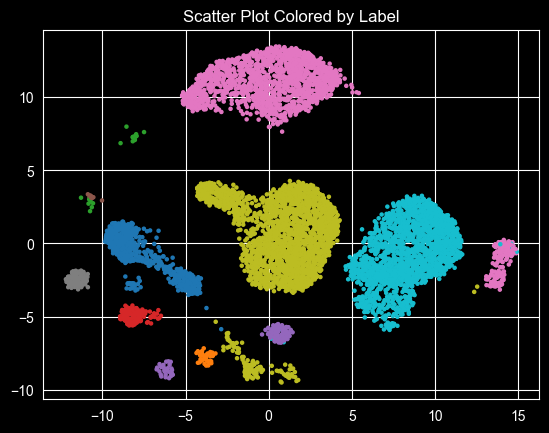

In [6]:
labels = adata2.obs['CellLabel'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata2.obsm['umap_2d_actionet'][:, 0],
    y=adata2.obsm['umap_2d_actionet'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()

In [7]:
actionet.run_actionet(adata, k_max=30, layer='logcounts', inplace=True)

Running ACTION decomposition...
Running ACTION (14 threads):
	Iterating from k = 2 ... 30: 0/29 finishedBuilding network...
	Iterating from k = 2 ... 30: 29/29 finished
Joining trace of C & H matrices (depth = 30) ... done (464 archetypes)
Pruning archetypes:
	Non-specific archetypes: 4
	Unreproducible archetypes: 64
	Trivial archetypes: 1
Merging 395 archetypes:
Archetypes in merged set: 24
Building adaptive network (density = 1.00)
	Building index ... done
	Identifying nearest neighbors ... done
	Constructing adaptive-nearest neighbor graph ... done
	Finalizing network ... done
Computing archetype footprints via diffusion...
Computing 2D UMAP layout...
Optimizing layout using method 'umap': 2 components 
UMAP embedding parameters a = 0.115, b = 1.929, gamma = 1.000
Optimizing for 100 epochs with 14 threads 
Optimizing with Adam:
	 alpha = 1.000,  beta1 = 0.500, beta2 = 0.900, eps = 1.000e-07
Optimization finished
Computing 3D UMAP layout...
Optimizing layout using method 'umap': 3 co

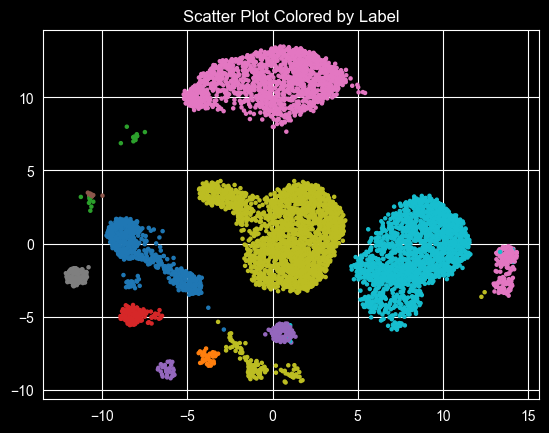

In [8]:
labels = adata.obs['CellLabel'].astype('category')
colors = labels.cat.codes  # Convert categories to integers

plt.scatter(
    x=adata.obsm['umap_2d_actionet'][:, 0],
    y=adata.obsm['umap_2d_actionet'][:, 1],
    c=colors,
    cmap='tab10',  # or another categorical colormap
    s = 5
)
# plt.xlabel('X')
# plt.ylabel('Y')
plt.title('Scatter Plot Colored by Label')
# plt.colorbar(label='CellLabel')
plt.show()